# Poisson分布モデル

* 黒木玄
* 2022-09-15
$
\newcommand\op[1]{{\operatorname{#1}}}
\newcommand\ybar{{\bar y}}
\newcommand\lambdahat{{\hat \lambda}}
\newcommand\pdf{\op{pdf}}
\newcommand\cdf{\op{cdf}}
\newcommand\ccdf{\op{ccdf}}
\newcommand\pvalue{\op{pvalue}}
$

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Poisson分布モデルの記述" data-toc-modified-id="Poisson分布モデルの記述-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Poisson分布モデルの記述</a></span><ul class="toc-item"><li><span><a href="#Poisson分布モデルの最尤法" data-toc-modified-id="Poisson分布モデルの最尤法-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Poisson分布モデルの最尤法</a></span></li><li><span><a href="#Poisson分布モデルの共役事前分布に関するベイズ統計" data-toc-modified-id="Poisson分布モデルの共役事前分布に関するベイズ統計-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Poisson分布モデルの共役事前分布に関するベイズ統計</a></span></li><li><span><a href="#互いの近似" data-toc-modified-id="互いの近似-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>互いの近似</a></span></li><li><span><a href="#Gamma(κ,-λ₀⁻¹)-の中央値は-(κ---1/3)/λ₀-で近似される" data-toc-modified-id="Gamma(κ,-λ₀⁻¹)-の中央値は-(κ---1/3)/λ₀-で近似される-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Gamma(κ, λ₀⁻¹) の中央値は (κ - 1/3)/λ₀ で近似される</a></span></li></ul></li><li><span><a href="#P値函数の近似的な一致の確認" data-toc-modified-id="P値函数の近似的な一致の確認-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>P値函数の近似的な一致の確認</a></span><ul class="toc-item"><li><span><a href="#Clopper-Pearson型のP値" data-toc-modified-id="Clopper-Pearson型のP値-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Clopper-Pearson型のP値</a></span></li><li><span><a href="#Pearsonのχ²検定のP値" data-toc-modified-id="Pearsonのχ²検定のP値-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Pearsonのχ²検定のP値</a></span></li><li><span><a href="#Clopper-Pearson型(equal-tailed-interval-(ETI)型)のBayes的P値" data-toc-modified-id="Clopper-Pearson型(equal-tailed-interval-(ETI)型)のBayes的P値-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Clopper-Pearson型(equal-tailed interval (ETI)型)のBayes的P値</a></span></li><li><span><a href="#Sterne型(highest-density-interval-(HDI)型)のBayes的P値" data-toc-modified-id="Sterne型(highest-density-interval-(HDI)型)のBayes的P値-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Sterne型(highest density interval (HDI)型)のBayes的P値</a></span></li><li><span><a href="#以上のP値函数達の近似的な一致の確認" data-toc-modified-id="以上のP値函数達の近似的な一致の確認-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>以上のP値函数達の近似的な一致の確認</a></span></li></ul></li></ul></div>

In [1]:
using Distributions
using Optim
using Roots
using StatsPlots
default(fmt=:png, titlefontsize=10)

## Poisson分布モデルの記述

### Poisson分布モデルの最尤法

データ: $y_1,\ldots,y_n$ は非負の整数であると仮定し, $(y_1,\ldots,y_n)$ をデータと呼ぶ.

その平均を $\ybar = \frac{1}{n}\sum_{i=1}^n y_i$ とおく.

次の統計モデルを考える:

$$
p(y_1,\ldots,y_n|\lambda)
= \prod_{i=1}^n \frac{e^{-\lambda} \lambda^{y_i}}{y_i!}
= \frac{e^{-n\lambda}\lambda^{n\ybar}}{y_1!\cdots y_n!}.
$$

このとき, 対数尤度函数の $-1$ 倍は次の形になる:

$$
-\log p(y_1,\ldots,y_n|\lambda) = n(\lambda - \ybar\log\lambda) + \sum_{i=1}^n \log y_i!. 
$$

対数尤度函数の $-1$ 倍の $\lambda$ に関する導函数は次のようになる:

$$
\begin{aligned}
&
-\frac{\partial}{\partial\lambda}\log p(y_1,\ldots,y_n|\lambda)
= n\left(1 - \frac{\ybar}{\lambda}\right),
\\ &
-\left(\frac{\partial}{\partial\lambda}\right)^2\log p(y_1,\ldots,y_n|\lambda)
= \frac{n\ybar}{\lambda^2}.
\end{aligned}
$$

この前者の公式より最尤推定値は次になることがわかる:

$$
\lambdahat = \ybar.
$$

### Poisson分布モデルの共役事前分布に関するベイズ統計

共役事前分布は $\op{Gamma}(\kappa, \lambda_0^{-1})$ になる. その密度函数を次のように書く:

$$
\varphi(\lambda|\kappa, \lambda_0) =
\frac{\lambda_0^\kappa}{\Gamma(\kappa)}e^{-\lambda_0\lambda}\lambda^{\kappa-1}.
$$

共役事前分布の事後分布を求めよう.

$$
p(y_1,\ldots,y_n|\lambda)\varphi(\lambda|\kappa, \lambda_0)
= (\text{independent of $\lambda$})\times e^{-(\lambda_0+n)\lambda}\lambda^{\kappa+n\ybar-1}
$$

より, 事後分布は次のようになる:

$$
\text{posterior} = \op{Gamma}\left(\kappa+n\ybar, (\lambda_0+n)^{-1}\right).
$$

Jeffreys priorを求めよう.  $y_1,\ldots,y_n$ が $\op{Poisson}(\lambda)$ のiidのとき,

$$
n\ybar \sim \op{Poisson}(n\lambda)
$$

となるので, $E[n\ybar] = n\lambda$ となり, 前節での計算結果より, 

$$
E\left[
-\left(\frac{\partial}{\partial\lambda}\right)^2\log p(y_1,\ldots,y_n|\lambda)
\right] = \frac{n}{\lambda} \propto \lambda^{-1}.
$$

ゆえに, Jeffreys prior は次になる:

$$
\text{Jeffreys prior} \propto \lambda^{-1/2}.
$$

形式的には

$$
\text{Jeffreys prior} = \op{Gamma}(1/2, \infty).
$$

$\lambda$, $\log\lambda$ について平坦な(一様な)improper 事前分布は形式的には

$$
\begin{aligned}
&
\text{improper prior flat in $\lambda$} = \op{Gamma}(1, \infty),
\\ &
\text{improper prior flat in $\log\lambda$} = \op{Gamma}(0, \infty).
\end{aligned}
$$

Jeffreys prior はこれらの中間に位置すると考えられる.

### 互いの近似

Poisson分布のcdfとガンマ分布のcdfの関係:

$$
\begin{aligned}
&
\cdf(\op{Poisson}(n\lambda, k) = \ccdf(\op{Gamma}(k+1, n^{-1}), \lambda)
\quad (k=0,1,2,\ldots), 
\\ &
\ccdf(\op{Poisson}(n\lambda, k-1) = \cdf(\op{Gamma}(k, n^{-1}), \lambda)
\quad (k=1,2,3,\ldots), 
\end{aligned}
$$

ゆえに $k = n\ybar$ のとき,

$$
\begin{aligned}
&
\cdf(\op{Poisson}(n\lambda, n\ybar) = \ccdf(\op{Gamma}(1+n\ybar, n^{-1}), \lambda),
\\ &
\ccdf(\op{Poisson}(n\lambda, n\ybar-1) = \cdf(\op{Gamma}(n\ybar, n^{-1}), \lambda).
\end{aligned}
$$

これらの右辺はそれぞれ $\kappa=1,0$, $\lambda_0=0$ の場合の共役事前分布の事後分布におけるccdfとcdfになっている. ゆえに, 

* (「単位時間あたり平均 $\lambda$ 回以上イベントが起きる」という仮説の片側検定のP値) = (improper事前分布 $\op{Gamma}(1,\infty)$ に対応する事後分布において, 「単位時間あたり平均 $\lambda$ 回以上イベントが起きる」という仮説が成立している確率)
* (「単位時間あたり平均 $\lambda$ 回以下イベントが起きる」という仮説の片側検定のP値) = (improper事前分布 $\op{Gamma}(0,\infty)$ に対応する事後分布において, 「単位時間あたり平均 $\lambda$ 回以下イベントが起きる」という仮説が成立している確率)

が成立している.

これより次が成立することもわかる:

* $n\ybar$ と $n$ が大きなとき, $\op{Gamma}(1+n\ybar, n^{-1})$ と $\op{Gamma}(n\ybar, n^{-1})$ はともに $\op{Gamma}\left(\kappa+n\ybar, (\lambda_0+n)^{-1}\right)$ で近似されるので, 片側検定のP値は事後分布で仮説が成立する確率で近似される.

### Gamma(κ, λ₀⁻¹) の中央値は (κ - 1/3)/λ₀ で近似される

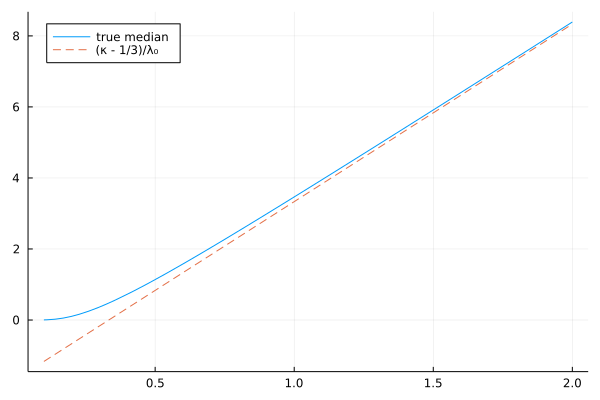

In [2]:
λ₀ = 1/5
plot(legend=:topleft)
plot!(κ -> median(Gamma(κ, 1/λ₀)), 0.1, 2; label="true median")
plot!(κ -> (κ - 1/3)/λ₀, 0.1, 2; label="(κ - 1/3)/λ₀", ls=:dash)

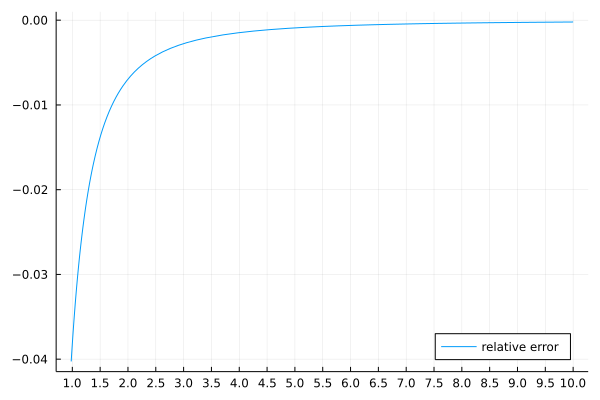

In [3]:
λ₀ = 1/5
plot(legend=:bottomright)
plot!(κ -> (κ - 1/3)/λ₀ / median(Gamma(κ, 1/λ₀)) - 1, 0.98, 10;
    label="relative error")
plot!(xtick=0:0.5:100)

このように, $\kappa \ge 1$ ならば $\op{Gamma}(\kappa, \lambda_0^{-1})$ のmedianの $(\kappa - 1/3)/\lambda_0$ による近似の相対誤差は $4\%$ 以内におさまる.

したがって, $\kappa=1/3$, $\lambda_0=0$ の場合の形式的な共役事前分布の事後分布 $\op{Gamma}(n\ybar+1/3, n^{-1})$ の中央値は最尤推定値 $\lambdahat = \ybar$ を近似する.

## P値函数の近似的な一致の確認

### Clopper-Pearson型のP値

Poisson分布モデルのClopper-Pearson型のP値が次のように定義される:

$$
\begin{aligned}
\pvalue_\op{CP}(\ybar|n, \lambda) &=
\min\begin{pmatrix}
1 \\
2\cdf(\op{Poisson}(n\lambda), n\ybar) \\
2\ccdf(\op{Poisson}(n\lambda), n\ybar-1) \\
\end{pmatrix}
\\ &=
\min\begin{pmatrix}
1 \\
2\ccdf(\op{Gamma}(n\ybar+1, 1/n), \lambda) \\
2\cdf(\op{Gamma}(n\ybar, 1/n), \lambda) \\
\end{pmatrix}.
\end{aligned}
$$

このP値函数にはClopper-Pearson型の信頼区間が対応している.

In [4]:
function pvalue_cp(ȳ, n, λ)
    poi = Poisson(n*λ)
    min(1, 2cdf(poi, n*ȳ), 2ccdf(poi, n*ȳ-1))
end

pvalue_cp(y, λ) =  pvalue_cp(mean(y), length(y), λ)

pvalue_cp (generic function with 2 methods)

### Pearsonのχ²検定のP値

Pearsonのχ²統計量が

$$
\chi^2(\ybar|n,\lambda) = \frac{(n\ybar - n\lambda)^2}{n\lambda} = \frac{n(\ybar-\lambda)^2}{\lambda}
$$

と定義され, Pearsonのχ²検定のP値が

$$
\pvalue_\op{Pearson}(\ybar|n, \lambda) = \ccdf(\op{Chisq}(1), \chi^2(\ybar|n,\lambda))
$$

と定義される.  このP値函数はスコア検定のP値函数に一致する.

In [5]:
chisq_pearson(ȳ, n, λ) = n*(ȳ - λ)^2/λ
pvalue_pearson(ȳ, n, λ) = ccdf(Chisq(1), chisq_pearson(ȳ, n, λ))

chisq_pearson(y, λ) = chisq_pearson(mean(y), length(y), λ)
pvalue_pearson(y, λ) = ccdf(Chisq(1), chisq_pearson(y, λ))

pvalue_pearson (generic function with 2 methods)

### Clopper-Pearson型(equal-tailed interval (ETI)型)のBayes的P値

共役事前分布 $\op{Gamma}(\kappa, \lambda_0^{-1})$ に対応するClopper-Pearson型(equal-tailed interval (ETI)型)のBayes的P値が次のように定義される:

$$
\pvalue_\op{Bayesian ETI}(\ybar|n, \lambda, \kappa, \lambda_0) =
\min\begin{pmatrix}
1 \\
2\ccdf(\op{Gamma}(\kappa+n\ybar, (\lambda_0+n)^{-1}), \lambda) \\
2\cdf(\op{Gamma}(\kappa+n\ybar, (\lambda_0+n)^{-1}), \lambda) \\
\end{pmatrix}.
$$

このP値函数に対応する信頼区間はETI (equal-tailed interval) 型のBayes信用区間になる.

In [6]:
function pvalue_bayesian_eti(ȳ, n, λ; κ=1//3, λ₀=0)
    gam = Gamma(κ+n*ȳ, 1/(λ₀+n))
    min(1, 2ccdf(gam, λ), 2cdf(gam, λ))
end

pvalue_bayesian_eti(y, λ; κ=1//3, λ₀=0) =
    pvalue_bayesian_eti(mean(y), length(y), λ; κ, λ₀)

pvalue_bayesian_eti (generic function with 2 methods)

### Sterne型(highest density interval (HDI)型)のBayes的P値

Sterne型(highest density interval (HDI)型)のBayes的P値が以下のように定義される:

$$
\pvalue_{Bayesian HDI}(\ybar|n, \lambda, \kappa, \lambda_0) =
\cdf(\op{Gamma}(\kappa+n\ybar, (\lambda_0+n)^{-1}), \lambda_L) +
\ccdf(\op{Gamma}(\kappa+n\ybar, (\lambda_0+n)^{-1}), \lambda_U).
$$

ここで, $\lambda = \lambda_L$ または $\lambda = \lambda_U$ でかつ

$$
\lambda_L \le \lambda_U, \quad
\pdf(\op{Gamma}(\kappa+n\ybar, (\lambda_0+n)^{-1}), \lambda_L) =
\pdf(\op{Gamma}(\kappa+n\ybar, (\lambda_0+n)^{-1}), \lambda_U).
$$

このP値函数に対応する信頼区間はHDI (highest density interval) 型のBayes信用区間になる.

In [7]:
function hdi(dist::ContinuousUnivariateDistribution, α = 0.05; alg = Brent())
    f(p) = quantile(dist, p + (1 - α)) - quantile(dist, p)
    o = optimize(f, 0, α, alg)
    p = o.minimizer
    quantile.(dist, (p, p + (1 - α)))
end

function pvalue_hdi(dist::ContinuousUnivariateDistribution, x₀; xlim = extrema(dist))
    p₀ = pdf(dist, x₀)
    m = mode(dist)
    f(x) = pdf(dist, x) - p₀
    if x₀ == m
        1.0
    elseif x₀ > m
        x₁ = find_zero(f, (xlim[begin], m))
        cdf(dist, x₁) + ccdf(dist, x₀)
    else
        x₁ = find_zero(f, (m, xlim[end]))
        cdf(dist, x₀) + ccdf(dist, x₁)
    end
end

function pvalue_bayesian_hdi(ȳ, n, λ; κ=1, λ₀=0)
    λ ≤ 0 && return zero(λ)
    gam = Gamma(κ+n*ȳ, 1/(λ₀+n))
    xlim = (eps(), 1/eps()) # shoddy work
    pvalue_hdi(gam, λ; xlim)
end

pvalue_bayesian_hdi(y, λ; κ=1//3, λ₀=0) =
    pvalue_bayesian_hdi(mean(y), length(y), λ; κ, λ₀)

pvalue_bayesian_hdi (generic function with 2 methods)

### 以上のP値函数達の近似的な一致の確認

In [8]:
function plot_pvals(; ȳ=1.0, n=10, κ_eti=1//3, λ₀_eti=0, κ_hdi=1, λ₀_hdi=0)
    xlim = max(0, ȳ - 4√(ȳ/n)), ȳ + 5√(ȳ/n)
    plot()
    plot!(λ -> pvalue_pearson(ȳ, n, λ), xlim...; label="Pearson χ²")
    plot!(λ -> pvalue_bayesian_eti(ȳ, n, λ; κ=κ_eti, λ₀=λ₀_eti), xlim...;
        label="Bayesian ETI", ls=:dash)
    plot!(λ -> pvalue_bayesian_hdi(ȳ, n, λ; κ=κ_hdi, λ₀=λ₀_hdi), xlim...;
        label="Bayesian HDI", ls=:dashdot)
    plot!(λ -> pvalue_cp(ȳ, n, λ), xlim...;
        label="Clopper-Pearson type", ls=:dot, lw=1.5)
    title!("ȳ = $ȳ, n = $n, κ_eti = $κ_eti, " *
        "λ₀_eti = $λ₀_eti, κ_hdi = $κ_hdi, λ₀_hdi = $λ₀_hdi")
end

plot_pvals (generic function with 1 method)

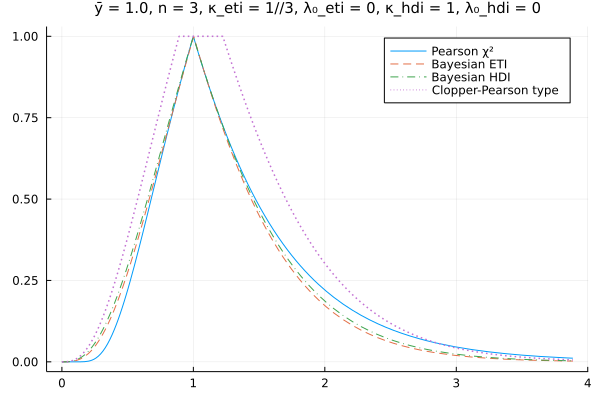

In [9]:
plot_pvals(ȳ = 1.0, n = 3, κ_eti=1//3, λ₀_eti=0, κ_hdi=1, λ₀_hdi=0)

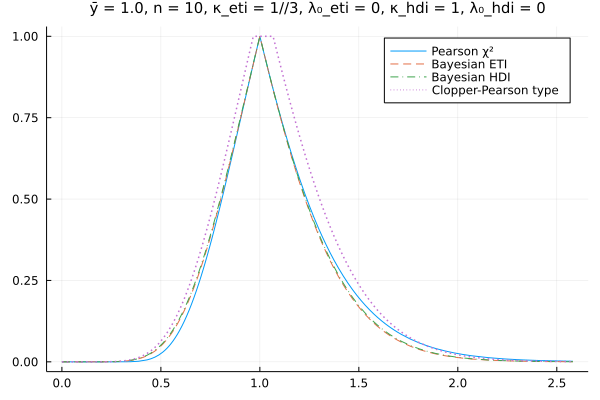

In [10]:
plot_pvals(ȳ = 1.0, n = 10, κ_eti=1//3, λ₀_eti=0, κ_hdi=1, λ₀_hdi=0)

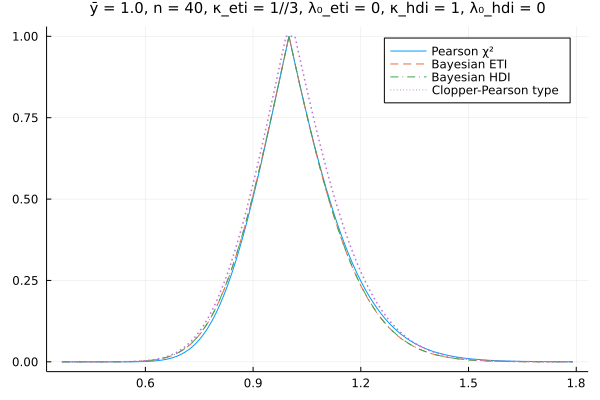

In [11]:
plot_pvals(ȳ = 1.0, n = 40, κ_eti=1//3, λ₀_eti=0, κ_hdi=1, λ₀_hdi=0)

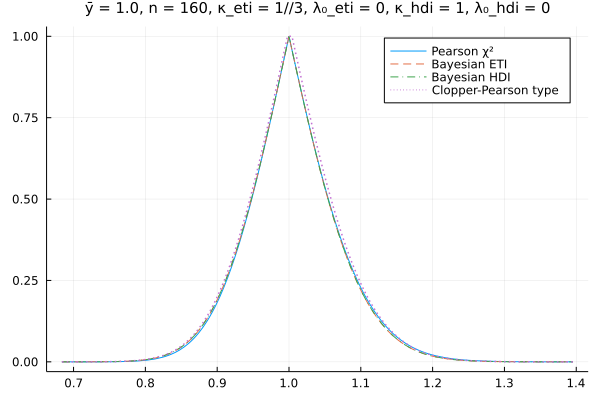

In [12]:
plot_pvals(ȳ = 1.0, n = 160, κ_eti=1//3, λ₀_eti=0, κ_hdi=1, λ₀_hdi=0)

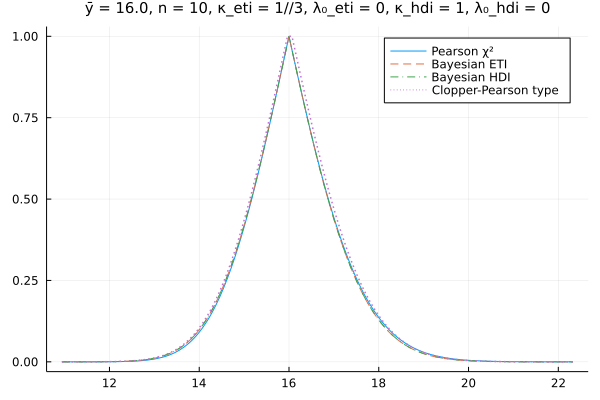

In [13]:
plot_pvals(ȳ = 16.0, n = 10, κ_eti=1//3, λ₀_eti=0, κ_hdi=1, λ₀_hdi=0)

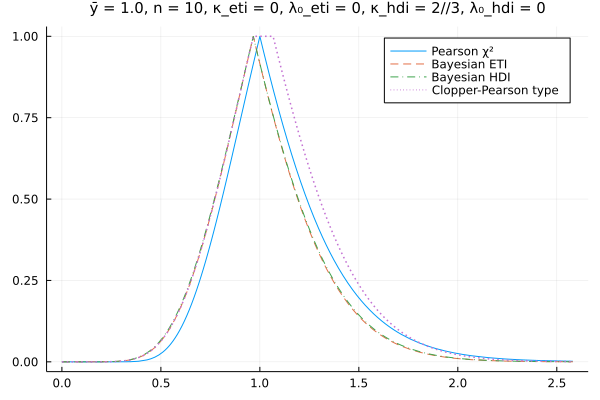

In [14]:
plot_pvals(ȳ = 1.0, n = 10, κ_eti=0, λ₀_eti=0, κ_hdi=2//3, λ₀_hdi=0)

$\kappa=0$, $\lambda_0=0$ の $\log\lambda$ に関する平坦事前分布から得られるETI型のBayes的P値函数のグラフは, 通常のClopper-Pearson型P値函数の左側の裾で一致する.

$\kappa=2/3$, $\lambda_0=0$ のimproper事前分布から得られるHDI型のBayes的P値函数のグラフは, 上の場合のETI型のBayes的P値函数に近似的に一致する.

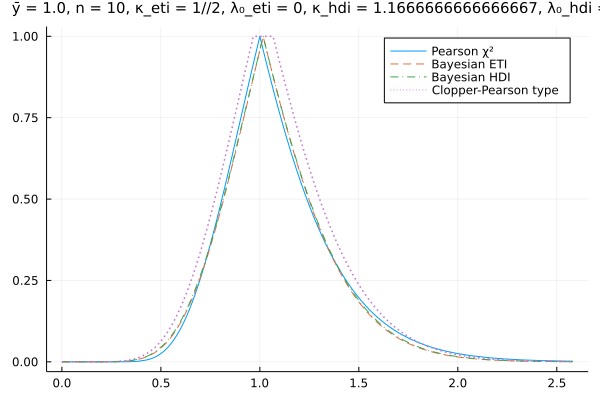

In [15]:
plot_pvals(ȳ = 1.0, n = 10, κ_eti=1//2, λ₀_eti=0, κ_hdi=7/6, λ₀_hdi=0)

$\kappa=1/2$, $\lambda_0=0$ のJeffreys priorから得られるETI型のBayes的P値函数のグラフは, 通常のClopper-Pearson型P値函数の左右の裾を内側に縮めた形になる. こうなることは, $\kappa=1/2$ の場合が, 上の $\kappa=0$ の場合と下の $\kappa=1$ の場合の中間になるので当然であると考えられる.

$\kappa=7/6$, $\lambda_0=0$ のimproper事前分布から得られるHDI型のBayes的P値函数のグラフは, 上の場合のETI型のBayes的P値函数に近似的に一致する.

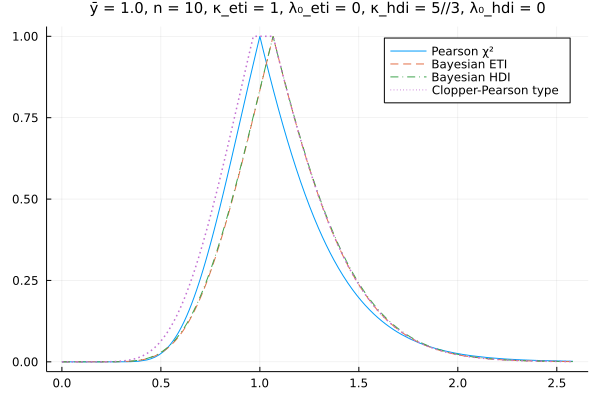

In [16]:
plot_pvals(ȳ = 1.0, n = 10, κ_eti=1, λ₀_eti=0, κ_hdi=5//3, λ₀_hdi=0)

$\kappa=1$, $\lambda_0=0$ の $\lambda$ に関する平坦事前分布から得られるETI型のBayes的P値函数のグラフは, 通常のClopper-Pearson型P値函数右側の裾で一致する.

$\kappa=5/3$, $\lambda_0=0$ のimproper事前分布から得られるHDI型のBayes的P値函数のグラフは, 上の場合のETI型のBayes的P値函数に近似的に一致する.

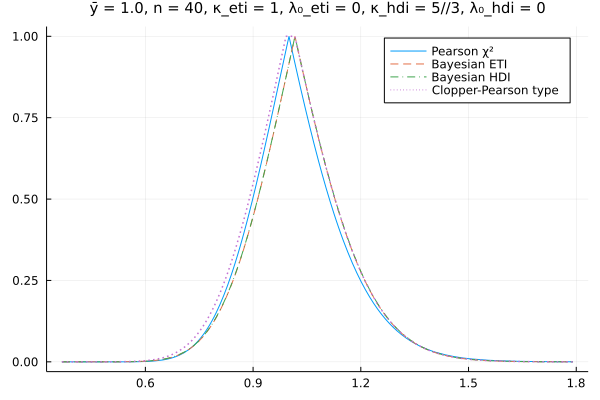

In [17]:
plot_pvals(ȳ = 1.0, n = 40, κ_eti=1, λ₀_eti=0, κ_hdi=5//3, λ₀_hdi=0)

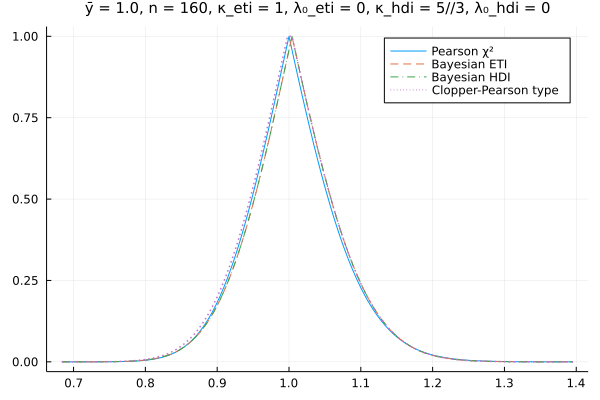

In [18]:
plot_pvals(ȳ = 1.0, n = 160, κ_eti=1, λ₀_eti=0, κ_hdi=5//3, λ₀_hdi=0)

$n$ を大きくすると, すべてがほぼ一致するようになる.